In [1]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Embedding, LSTM, GRU, SimpleRNN
from keras.optimizers import Adadelta
from keras.utils import np_utils, to_categorical
from keras.preprocessing import sequence
import numpy as np

from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train_orig), (X_test, y_test_orig) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_train /= 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
X_test /= 255.0
print(X_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1)


In [3]:
import string
chars = [x for x in string.ascii_letters][:26]
chars.insert(0, '$')
print(chars)

# 文字数を揃えている
labels = ['zero$', 'one$$', 'two$$', 'three', 'four$', 'five$', 'six$$', 'seven', 'eight', 'nine$']


def convert_features(y):
    y_tmp = []

    for x in y:
        v = list(labels[x])
        v = [chars.index(x) for x in list(labels[x])]
        y_tmp.append(v)

    return y_tmp

maxlen=5
y_train = convert_features(y_train_orig)
y_train = sequence.pad_sequences(y_train, maxlen=maxlen)
y_train = to_categorical(y_train)

y_test = convert_features(y_test_orig)
y_test = sequence.pad_sequences(y_train, maxlen=maxlen)
y_test = to_categorical(y_test)

print(y_test[0])

['$', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[[[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.

In [0]:
from keras.layers import Dense, Conv2D, BatchNormalization
from keras.layers import Activation, Flatten, Dropout, UpSampling2D, MaxPooling2D, Reshape, GlobalAveragePooling2D

from keras.layers.core import RepeatVector
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed

In [6]:
model = Sequential()
batch_size = 16

# Encoder,CNN
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(GlobalAveragePooling2D())

# Decoder,LSTM
n_output = 26+1
n_hidden = 64
# RepeatVectorは、inputとして入ってくるベクトルを、指定した数だけ繰り返すラッパー
model.add(RepeatVector(maxlen))
model.add(LSTM(n_hidden,
                          return_sequences=True,
                          batch_size=batch_size))
# TimeDistributedは、入力されたシーケンスの各時刻に同様のネットワーク構造を付加できるラッパー
model.add(TimeDistributed(Dense(n_output)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)                0         
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 5, 64)             0         
__________

In [8]:
print(y_train_orig[0])
print(y_train[0])

5
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]


In [9]:
model.fit(X_train, y_train,
         batch_size = batch_size,
         epochs = 5,
         validation_split = 0.1)

W0703 08:34:29.234090 140268107184000 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0703 08:34:29.939938 140268107184000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 50s 932us/step - loss: 0.5004 - acc: 0.8435 - val_loss: 0.1007 - val_acc: 0.9711
Epoch 2/5
54000/54000 [==============================] - 47s 862us/step - loss: 0.0953 - acc: 0.9707 - val_loss: 0.0581 - val_acc: 0.9826
Epoch 3/5
54000/54000 [==============================] - 47s 863us/step - loss: 0.0619 - acc: 0.9811 - val_loss: 0.0372 - val_acc: 0.9885
Epoch 4/5
54000/54000 [==============================] - 47s 862us/step - loss: 0.0463 - acc: 0.9858 - val_loss: 0.0490 - val_acc: 0.9858
Epoch 5/5
54000/54000 [==============================] - 47s 867us/step - loss: 0.0366 - acc: 0.9886 - val_loss: 0.0352 - val_acc: 0.9904


In [0]:
def vector_to_text(vec):
    text = ''
    for v in vec:
        if v != 0:
            print(chars[v])
            text += chars[v]

    return text

In [15]:
results = model.predict_classes(X_test)
print(results[0])

[19  5 22  5 14]


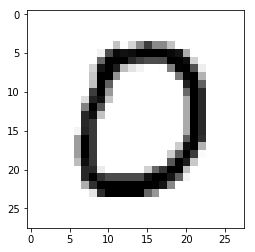

z
e
r
o
predicted =  zero


In [22]:
from matplotlib import cm

# ここの数字を変えるとテストデータを変えられる
test_index = 10

result = results[test_index]
plt.imshow(X_test[test_index].reshape(28, 28), cmap=cm.gray_r)
plt.show()
print('predicted = ', vector_to_text(result))